# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [2]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

In [2]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE. Tuy nhiên trong Asm này, học viên chỉ cần xử lý từ ngày đầu đến ngày 8/4/2021.

In [3]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
#idx2 = deaths_df['4/8/21'].index
idx2 = deaths_df.columns.get_loc('4/8/21')
idx2

446

In [9]:
deaths_df_copy = deaths_df.iloc[:,:idx2+1]
deaths_df_copy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,115,115,115,116,117,117,117,117,119,120
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,536,537,538,538,540,542,543,547,547,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,2614,2627,2645,2661,2681,2706,2716,2735,2753,2781
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,882,888,906,916,932,946,955,976,986,1004
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1202,1208,1212,1215,1215,1220,1222,1224,1224,1225


In [86]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [10]:
# Nhận code bạn tại đây để recoveries_df chỉ chưa dữ liệu đến ngày 8/4/2021
idx3 = recoveries_df.columns.get_loc('4/9/21')

recoveries_df_copy = recoveries_df.iloc[:,:idx3]
recoveries_df_copy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,51473,51550,51788,51798,51802,51885,51902,51928,51940,51956
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,90617,91271,91875,92500,93173,93842,94431,95035,95600,96129
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,81442,81538,81632,81729,81813,81896,81994,82096,82192,82289
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11276,11315,11365,11401,11428,11474,11523,11570,11616,11692
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20446,20493,20508,20867,20871,20879,21452,21489,21545,21557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,213590,215429,217224,217224,220418,222007,223249,224552,226090,227988
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1667,1676,1682,1691,1715,1738,1772,1822,1886,1946
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,84519,84592,84698,84825,85017,85068,85178,85338,85409,85446


In [12]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [13]:
idx1 = confirmed_df.columns.get_loc('4/9/21')
confirmed_df_copy = confirmed_df.iloc[:,:idx1]
confirmed_df_copy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,88199,88418,88549,88730,88800,88930,89009,89071,89386,89592


In [14]:
confirmed_df_copy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,88199,88418,88549,88730,88800,88930,89009,89071,89386,89592


#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [148]:
#Ngay dau tien ghi du lieu cua ca nhiem
for i in range (confirmed_df.shape[1]):
    try:
        pd.to_datetime(confirmed_df.columns[i])
        print(f'First day reconized confirmed data (MM/DD/YY): {confirmed_df.columns[i]}')
        break
    except:
        continue

First day reconized confirmed data (MM/DD/YY): 1/22/20


In [149]:
#Ngay dau tien ghi du lieu cua ca nhiem bi tu vong
for i in range (deaths_df.shape[1]):
    try:
        pd.to_datetime(deaths_df.columns[i])
        print(f'First day reconized Death data (MM/DD/YY): {deaths_df.columns[i]}')
        break
    except:
        continue

First day reconized Death data (MM/DD/YY): 1/22/20


In [150]:
#Ngay dau tien ghi du lieu cua ca phuc hoi
for i in range (recoveries_df.shape[1]):
    try:
        pd.to_datetime(recoveries_df.columns[i])
        print(f'First day reconized recovery data (MM/DD/YY): {recoveries_df.columns[i]}')
        break
    except:
        continue

First day reconized recovery data (MM/DD/YY): 1/22/20


    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [153]:
# Nhập code ở đây:
print(f'Last day confirmed data (MM/DD/YY): {confirmed_df.columns[confirmed_df.shape[1]-1]}')
print(f'Last day deaths data (MM/DD/YY): {deaths_df.columns[deaths_df.shape[1]-1]}')
print(f'Last day recovery data (MM/DD/YY): {recoveries_df.columns[recoveries_df.shape[1]-1]}')

Last day confirmed data (MM/DD/YY): 9/10/22
Last day deaths data (MM/DD/YY): 9/10/22
Last day recovery data (MM/DD/YY): 9/10/22


    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [159]:
# Nhập code ở đây:
len(pd.unique(deaths_df['Country/Region']))

199

    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [162]:
# Nhập code ở đây:
for i in range (deaths_df.shape[1]):
    try:
        pd.to_datetime(deaths_df.columns[i])
        a = i
        break
    except:
        continue
print (deaths_df.shape[1]-a)

963


    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [164]:
# Nhập code ở đây (confirmed_df):
confirmed_df[confirmed_df.duplicated(subset = 'Country/Region') == True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3442274,3445866,3448746,3451076,3454061,3457721,3461037,3463759,3463759,3463759
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,95971,95971,95971,96142,96252,96324,96399,96399,96447,96447
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1610200,1610200,1610200,1611208,1615258,1617036,1618600,1620034,1620034,1620034
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,754249,755363,755748,755748,756189,757540,757540,758216,758840,758840
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,245957,246135,246248,246348,246545,246706,246706,246706,246706,246706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,58890,58890,58890,58890,58890,58890,59163,59163,59163,59163
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1145,1190,1190,1190,1190,1229,1229,1229,1229,1276
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,6369,6369,6369,6369,6369,6372,6372,6372,6372,6372


In [165]:
# Nhập code ở đây (deaths_df):
deaths_df[deaths_df.duplicated(subset = 'Country/Region') == True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,4928,4946,4952,4954,4980,5001,5026,5046,5046,5046
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,70,70,70,70,70,70,70,70,70,70
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1986,1986,1986,1988,2003,2027,2027,2048,2048,2048
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,778,787,787,787,788,796,796,798,860,860
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,180,181,181,181,182,182,182,182,182,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,136
271,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
272,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36


In [166]:
# Nhập code ở đây (recoveries_df):
recoveries_df[recoveries_df.duplicated(subset = 'Country/Region') == True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [172]:
# Nhập code ở đây (recoveries_df): Là những quốc gia mà có Province/State value = null. Giống như các quốc gia bị trùng
mask = recoveries_df['Province/State'].notnull()
by_province = recoveries_df[mask]
by_province

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
not_by_province = recoveries_df[~recoveries_df['Country/Region'].isin(pd.unique(by_province['Country/Region']))]
not_by_province['Country/Region'].tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Hondur

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [173]:
# Nhập code ở đây (recoveries_df):
pd.unique(by_province['Country/Region'])

array(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [215]:
#recoveries_df.loc[c['9/1/22'].idxmax()]
# confirmed_df.max(numeric_only=True).max()
# confirmed_df.max(axis=0,numeric_only=True).max()
# confirmed_df.max(axis=0,numeric_only=True).idxmax()
# confirmed_df.max(axis=1).idxmax()
print(str(confirmed_df['Country/Region'].loc[257]) + ' - ' + str(confirmed_df.max(axis=0,numeric_only=True).idxmax()) + ' - ' + str(int(confirmed_df.max(axis=0,numeric_only=True).max())))

US - 9/10/22 - 95242750


In [216]:
# Nhập code ở đây:
print(str(confirmed_df['Country/Region'].loc[257]) + ' - ' + str(confirmed_df.max(axis=0,numeric_only=True).idxmax()) + ': ' + str(int(confirmed_df.max(axis=0,numeric_only=True).max())))

US - 9/10/22: 95242750


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [218]:
# Nhập code ở đây:
print(str(deaths_df['Country/Region'].loc[257]) + ': ' + str(int(deaths_df.max(axis=0,numeric_only=True).max())))

US: 1050318


    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [229]:
idx_vn = deaths_df.index[deaths_df['Country/Region']=='Vietnam']

In [232]:
confirmed_df.iloc[idx_vn,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22
279,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,11414359,11415907,11417503,11418894,11421055,11424754,11428632,11431823,11435472,11437970


In [238]:
# Nhập code ở đây:
print(f'Tong so ca mac Covid: {int(confirmed_df.iloc[idx_vn,:].max(axis=1,numeric_only=True ))}')
print(f'Tong so ca tu vong do Covid: {int(deaths_df.iloc[idx_vn,:].max(axis=1,numeric_only=True ))}')
print(f'Tong so ca Covid da phuc hoi hoac dang con: {int(confirmed_df.iloc[idx_vn,:].max(axis=1,numeric_only=True )) - int(deaths_df.iloc[idx_vn,:].max(axis=1,numeric_only=True ))}')

Tong so ca mac Covid: 11437970
Tong so ca tu vong do Covid: 43126
Tong so ca Covid da phuc hoi hoac dang con: 11394844


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [3]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = confirmed.sum().tolist()
total_deaths = deaths.sum().tolist()
mortality_rate = (deaths.sum()/confirmed.sum()*100).tolist()
recovery_rate = (recoveries.sum()/confirmed.sum()*100).tolist()
total_recovered = recoveries.sum().tolist()
total_active = (confirmed.sum()-deaths.sum()-recoveries.sum()).tolist()
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập code ở đây:


In [165]:
increase_day = np.array([(total_cases[i] - total_cases[i-1]) for i in range(1,len(total_cases))])

In [172]:
increase_day = np.insert(increase_day,0,0)

In [245]:
print(f'Tong so ca tu vong do Covid: {deaths[cols[-1]].sum()} ca')

6513388

In [124]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  621459972
Total death cases:  6557435
Total recoveries cases:  0
Total active cases:  614902537


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

In [ ]:
confirmed = confirmed_df.loc[:, '1/22/20':].sum()
death = deaths_df.loc[:, '1/22/20':].sum()
recovery = recoveries_df.loc[:, '1/22/20':].sum()

val_confirmed = list()
val_death = list()
val_recovery = list()


idx = (pd.to_datetime(confirmed.index[-1]) - pd.to_datetime(confirmed.index[0])).days
idxx2 = np.arange(0, idx +1 , 1)


for i in range(len(confirmed)):
    val_confirmed.append(np.log10(confirmed.values[i]))
    val_death.append(np.log10(death.values[i]))
    val_recovery.append(np.log10(recovery.values[i]))

In [4]:
logarit_case = np.log10(total_cases).tolist()
logarit_death = np.log10(total_deaths).tolist()
logarit_recovery = np.log10(total_recovered).tolist()
logarit_active = np.log10(total_active).tolist()

C:\Users\Long\AppData\Local\Temp\ipykernel_20864\2365993849.py:3: RuntimeWarning:

divide by zero encountered in log10

C:\Users\Long\AppData\Local\Temp\ipykernel_20864\2365993849.py:3: RuntimeWarning:

invalid value encountered in log10



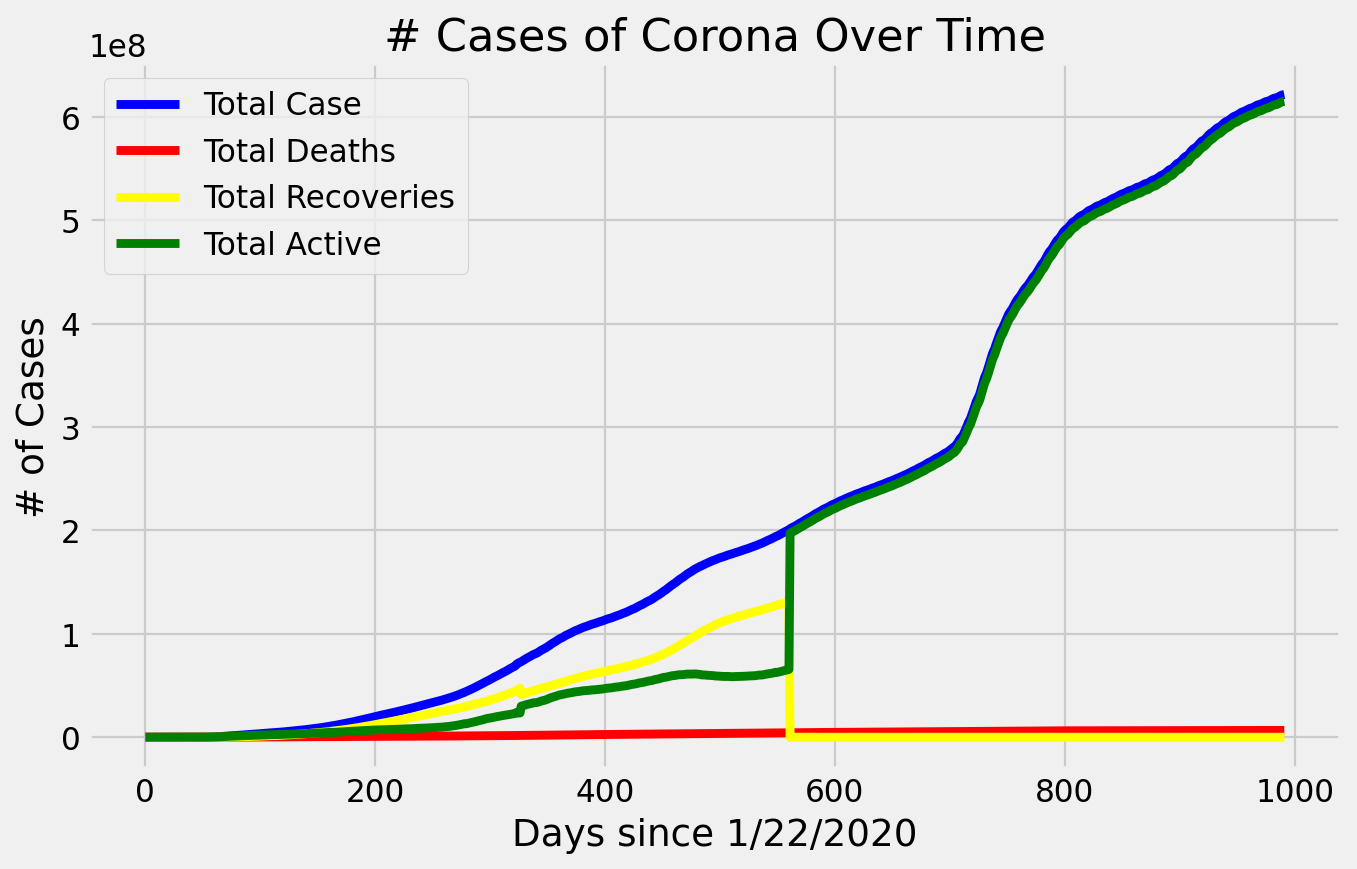

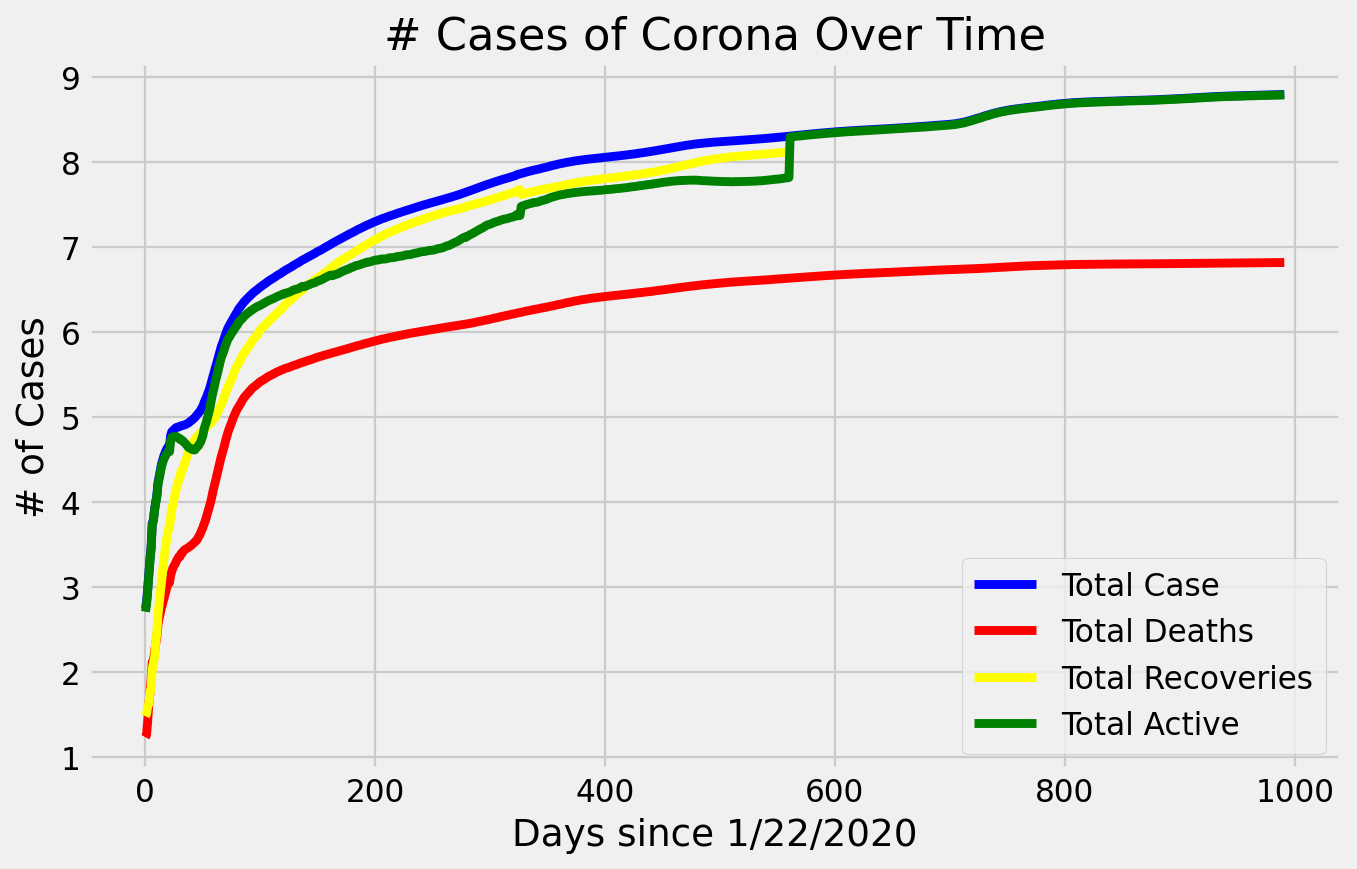

In [157]:
plt.figure(figsize=(9,12), dpi=160)
plt.subplot(2, 1, 1)
plt.plot(adjusted_dates, total_cases, label='Total Case', color = 'blue')
plt.plot(adjusted_dates, total_deaths, label='Total Deaths', color = 'red')
plt.plot(adjusted_dates, total_recovered, label='Total Recoveries', color = 'yellow')
plt.plot(adjusted_dates, total_active, label='Total Active', color = 'green')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# Cases of Corona Over Time")
plt.legend()

plt.figure(figsize=(9,12), dpi=160)
plt.subplot(2, 1, 2)
plt.plot(adjusted_dates, logarit_case, label='Total Case', color = 'blue')
plt.plot(adjusted_dates, logarit_death, label='Total Deaths', color = 'red')
plt.plot(adjusted_dates, logarit_recovery, label='Total Recoveries', color = 'yellow')
plt.plot(adjusted_dates, logarit_active, label='Total Active', color = 'green')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# Cases of Corona Over Time")
plt.legend()

## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

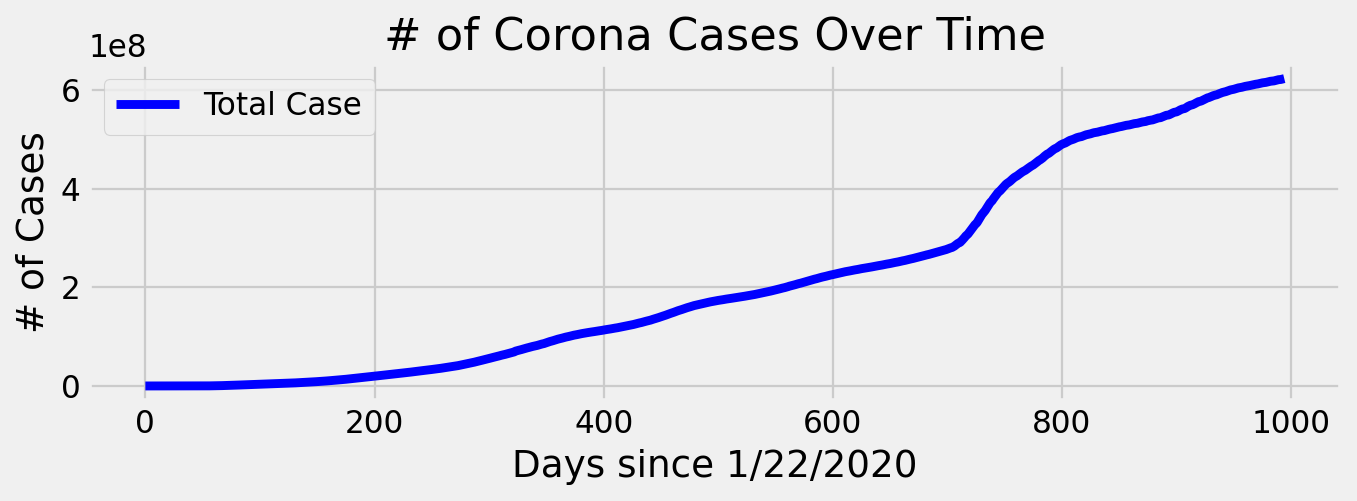

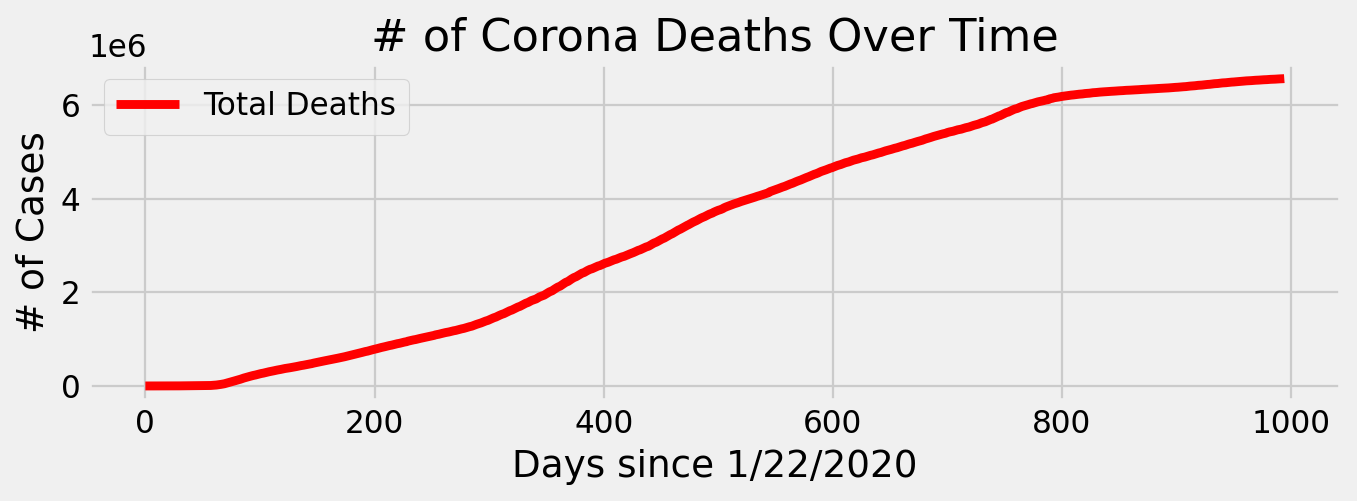

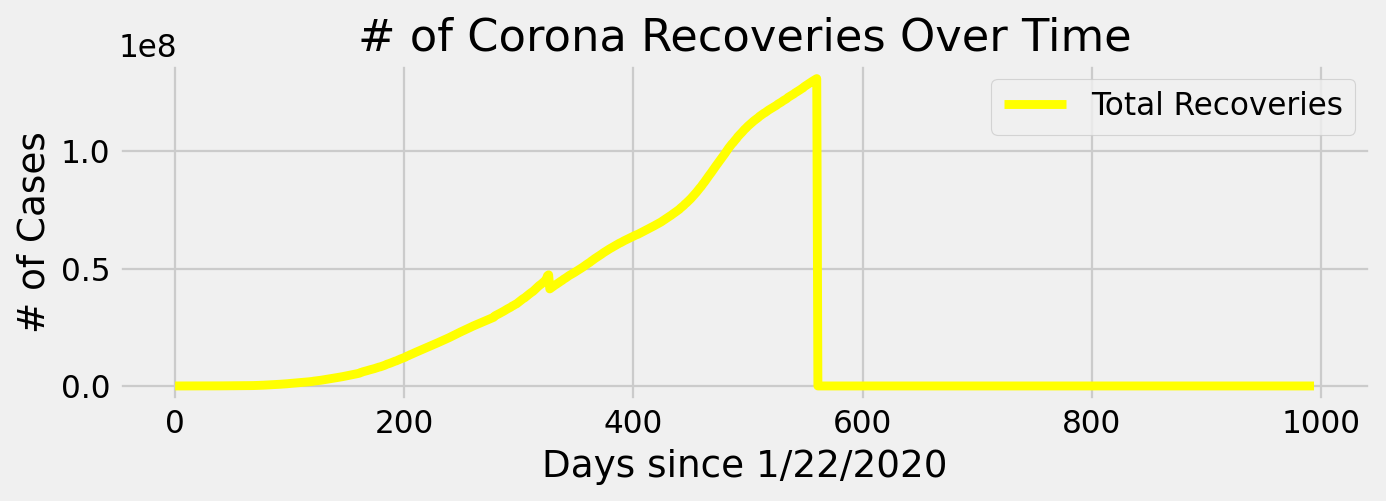

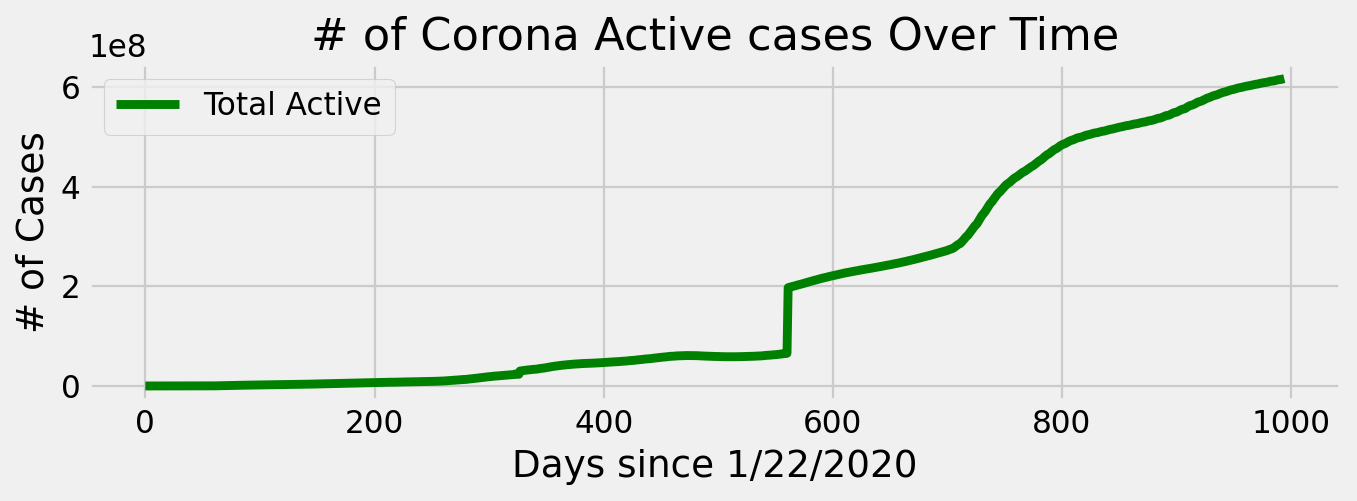

In [5]:
#Nhập code ở đây:
plt.figure(figsize=(9,12), dpi=160)
plt.subplot(4, 1, 1)
plt.plot(adjusted_dates, total_cases, label='Total Case', color = 'blue')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# of Corona Cases Over Time")
plt.legend()

plt.figure(figsize=(9,12), dpi=160)
plt.subplot(4, 1, 2)
plt.plot(adjusted_dates, total_deaths, label='Total Deaths', color = 'red')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# of Corona Deaths Over Time")
plt.legend()

plt.figure(figsize=(9,12), dpi=160)
plt.subplot(4, 1, 3)
plt.plot(adjusted_dates, total_recovered, label='Total Recoveries', color = 'yellow')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# of Corona Recoveries Over Time")
plt.legend()

plt.figure(figsize=(9,12), dpi=160)
plt.subplot(4, 1, 4)
plt.plot(adjusted_dates, total_active, label='Total Active', color = 'green')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("# of Corona Active cases Over Time")
plt.legend()

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [6]:
#Nhập code ở đây:
#total cases increase
inc_cases = np.diff(total_cases)
inc_cases = np.insert(inc_cases,0,0)
#total deaths increase
inc_deaths = np.diff(total_deaths)
inc_deaths = np.insert(inc_deaths,0,0)
#total recoveries increase
inc_recoveries = np.diff(total_recovered)
inc_recoveries = np.insert(inc_recoveries,0,0)
#total active increase
inc_active = np.diff(total_active)
inc_active = np.insert(inc_active,0,0)

## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

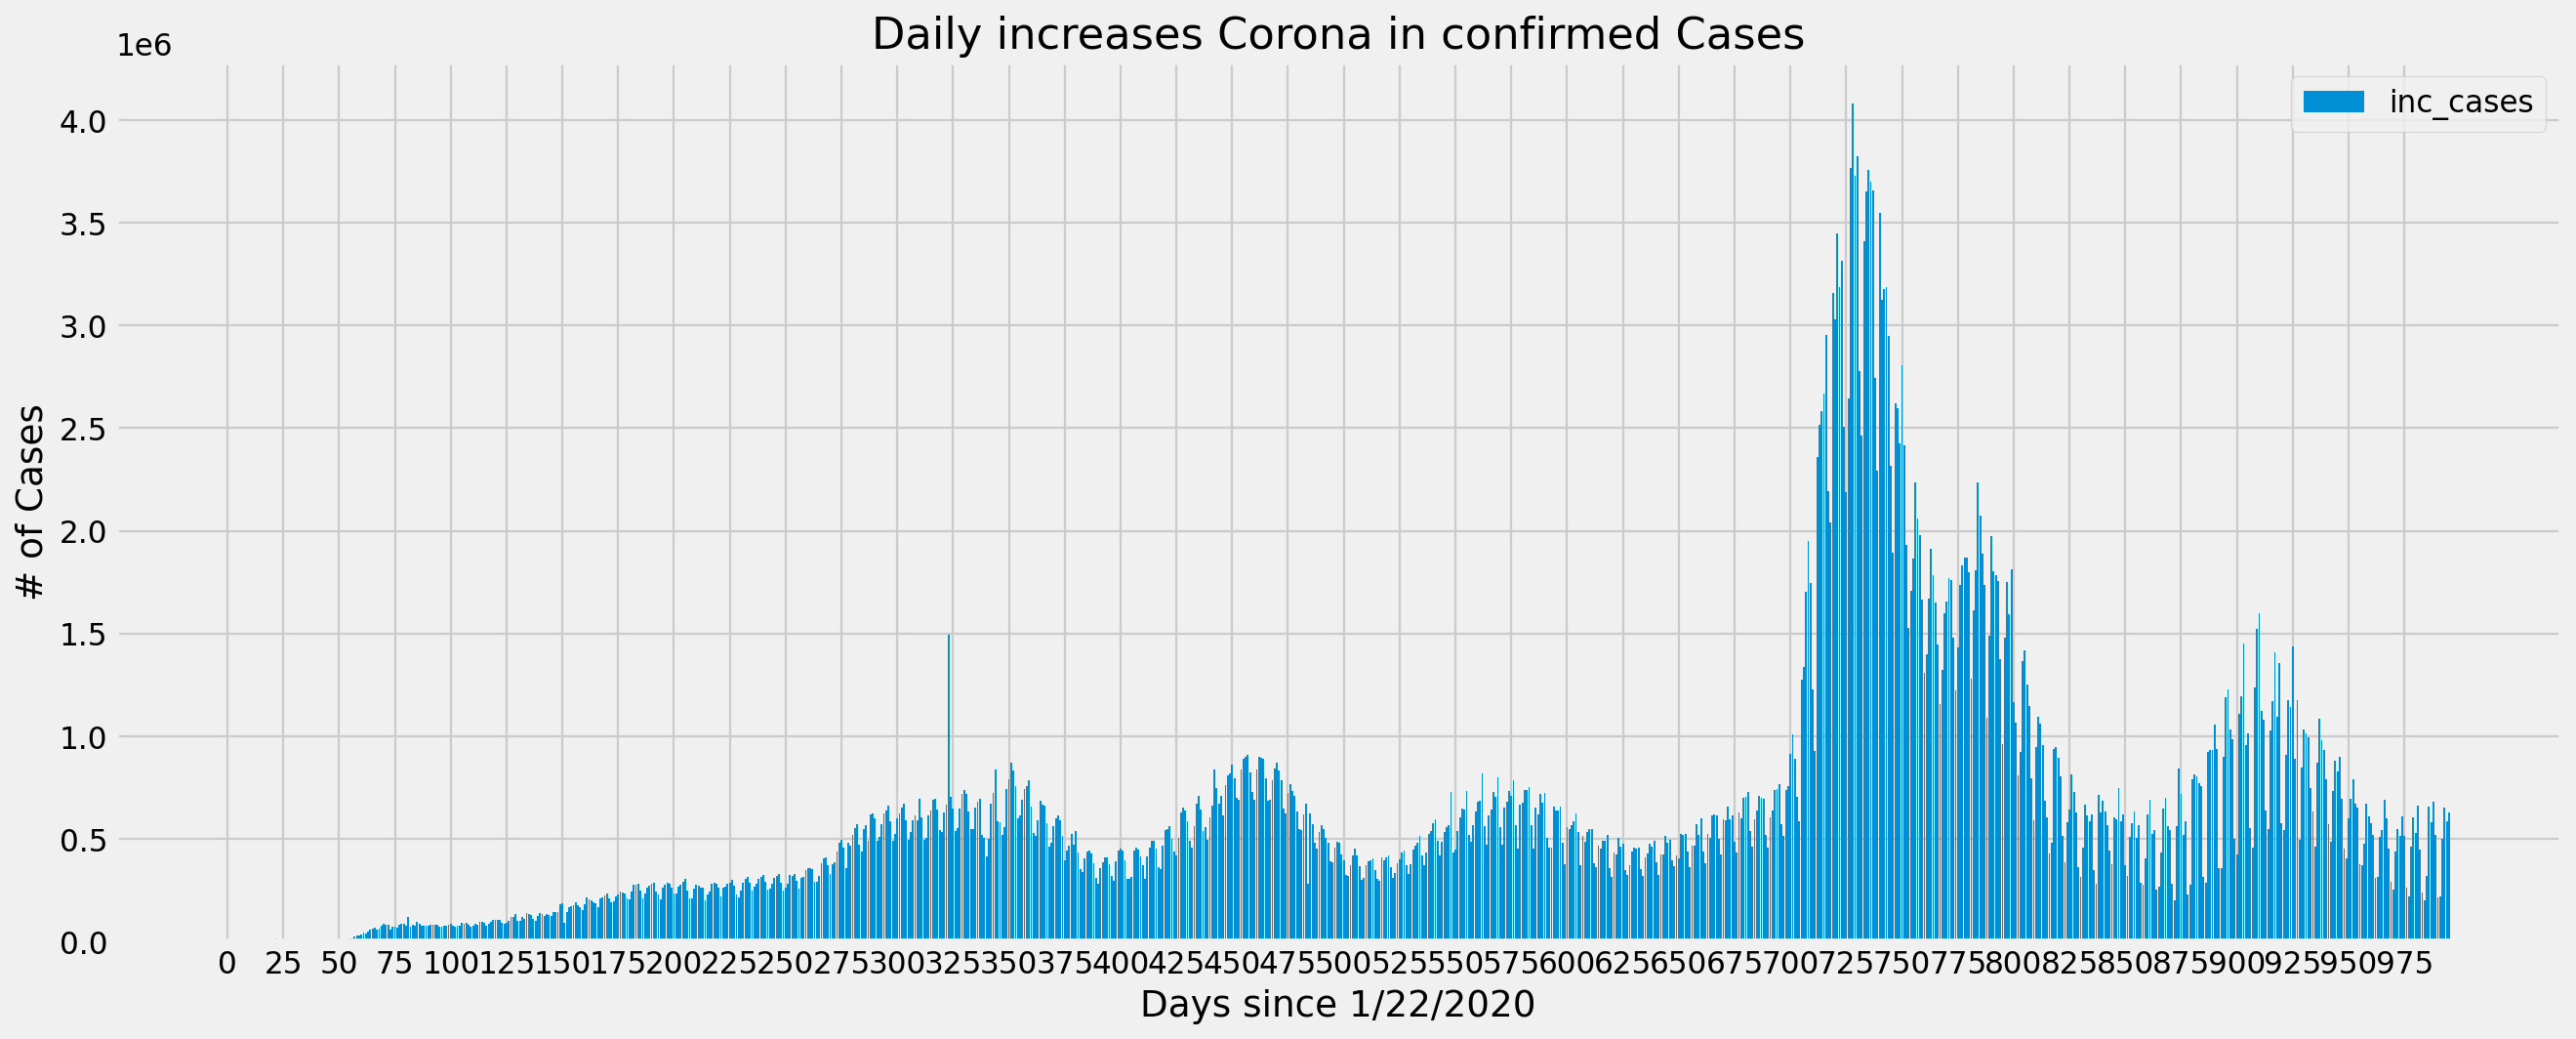

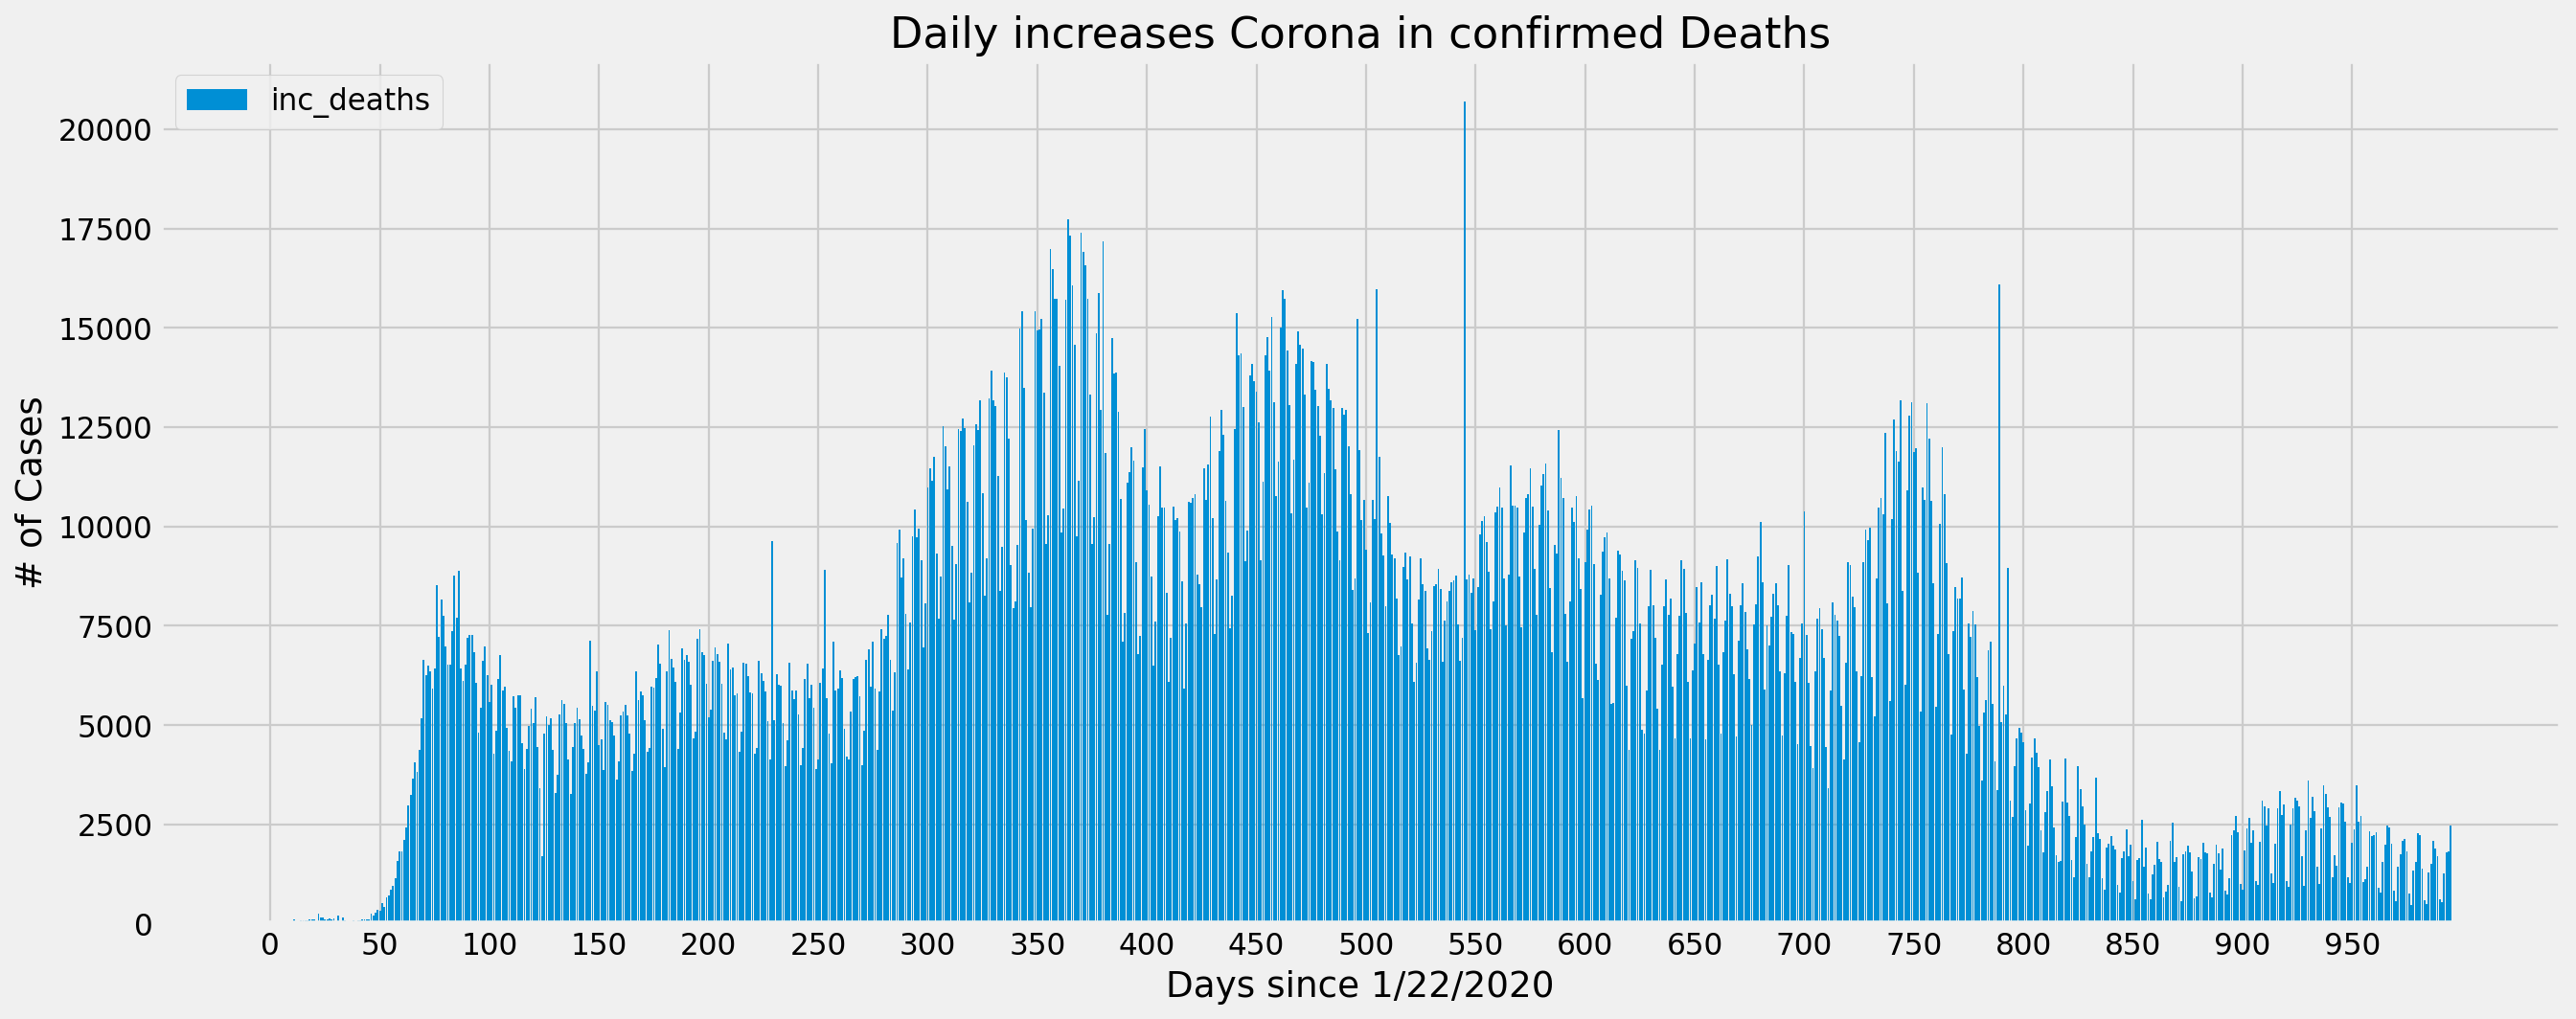

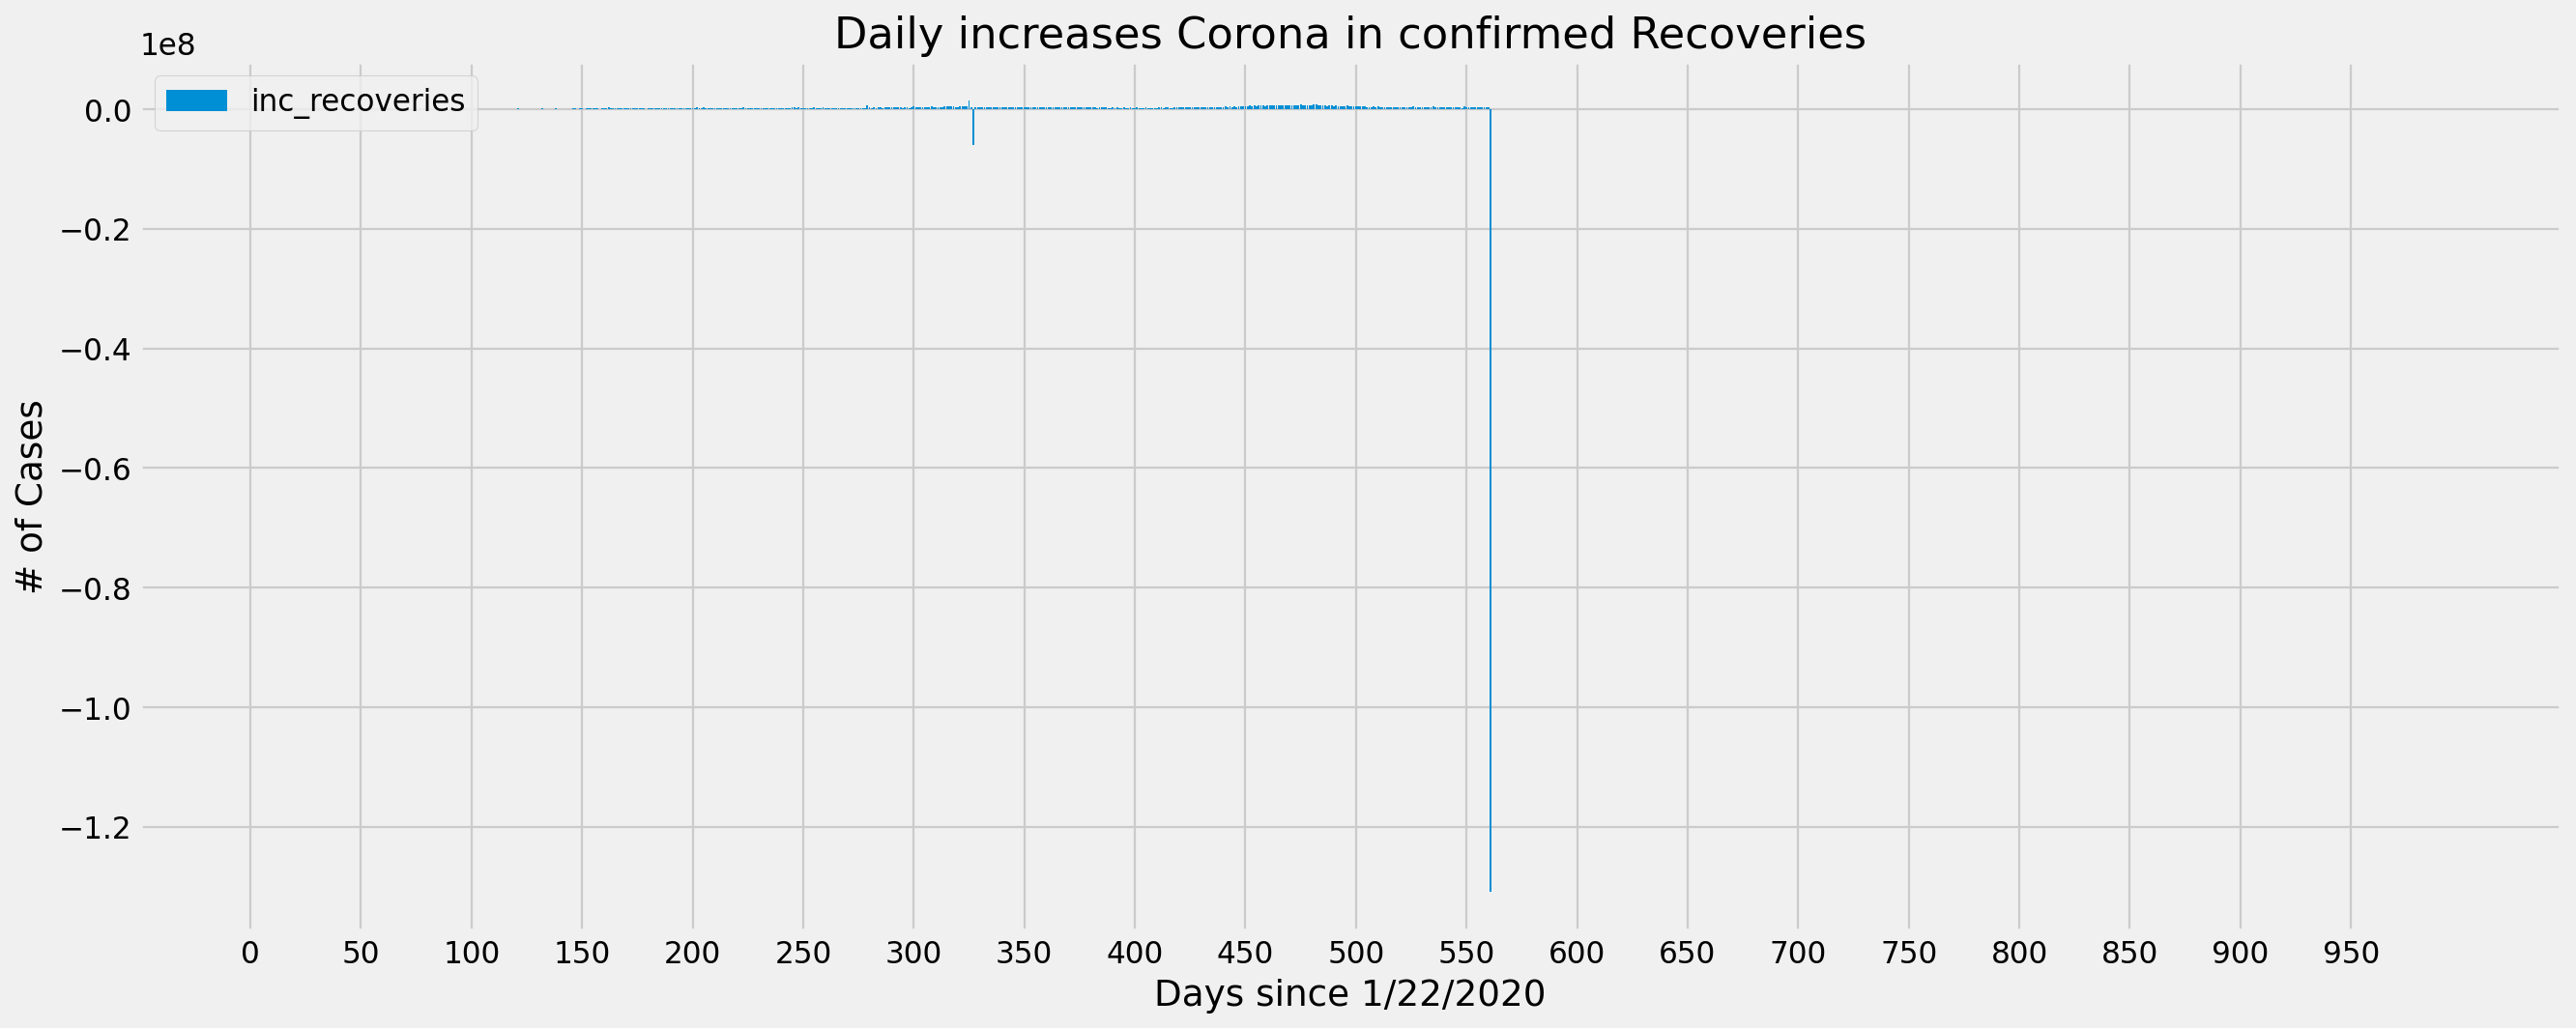

In [44]:
plt.figure(figsize=(18,32), dpi=160)
plt.subplot(4,1,1)
plt.bar(adjusted_dates, inc_cases, label="inc_cases")
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("Daily increases Corona in confirmed Cases")
plt.xticks(np.arange(0, len(adjusted_dates)+1, 25))
plt.legend()

#plt.legend(["inc_cases"], loc ='upper left')

plt.figure(figsize=(18,32), dpi=160)
plt.subplot(4,1,2)
plt.bar(adjusted_dates, inc_deaths, label="inc_deaths")
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("Daily increases Corona in confirmed Deaths")
plt.xticks(np.arange(0, len(adjusted_dates)+1, 50))
plt.legend(loc ='upper left')


plt.figure(figsize=(18,32), dpi=160)
plt.subplot(4,1,3)
plt.bar(adjusted_dates, inc_recoveries)
plt.xlabel("Days since 1/22/2020")
plt.ylabel("# of Cases")
plt.title("Daily increases Corona in confirmed Recoveries")
plt.xticks(np.arange(0, len(adjusted_dates)+1, 50))
plt.legend(["inc_recoveries"], loc ='upper left')




Text(0.5, 1.0, 'World Daily Increases in Confirmed Recovereds')

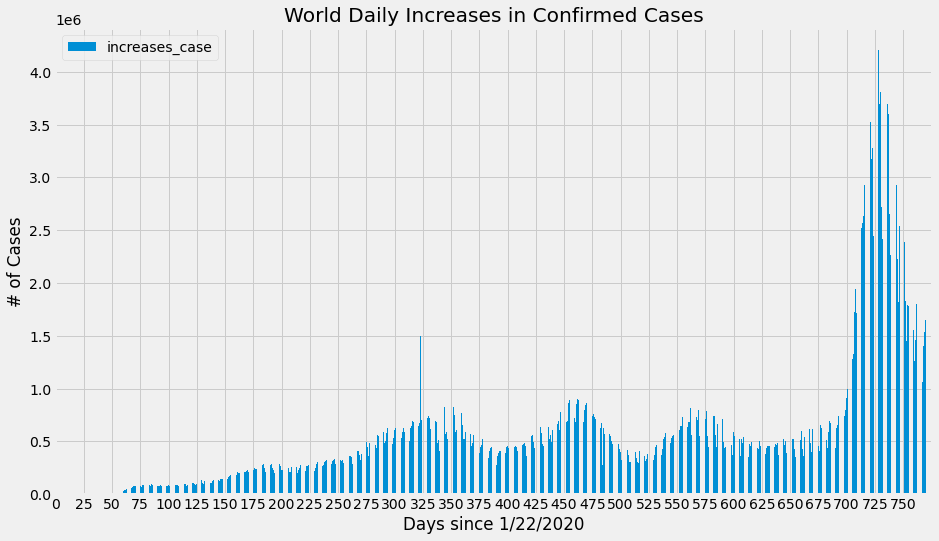

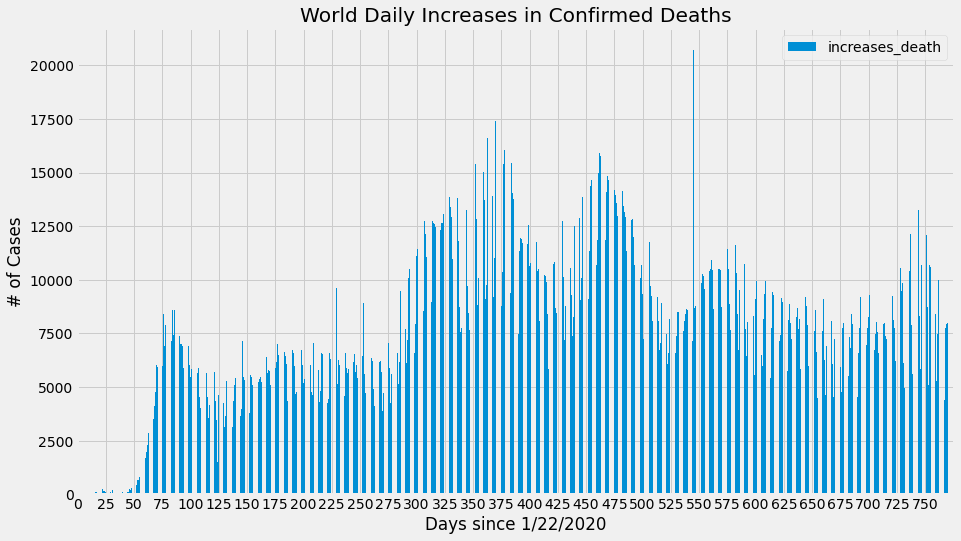

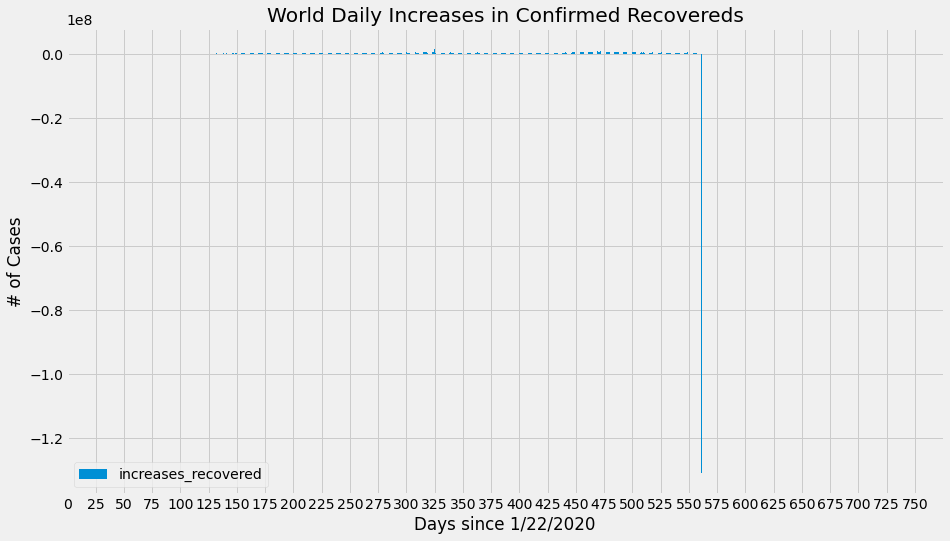

In [ ]:
#Nhập code ở đây:


## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [25]:
#Nhập code ở đây:
mortality_rate = (deaths.sum()/confirmed.sum()*100).tolist()
recovery_rate = (recoveries.sum()/confirmed.sum()*100).tolist()

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

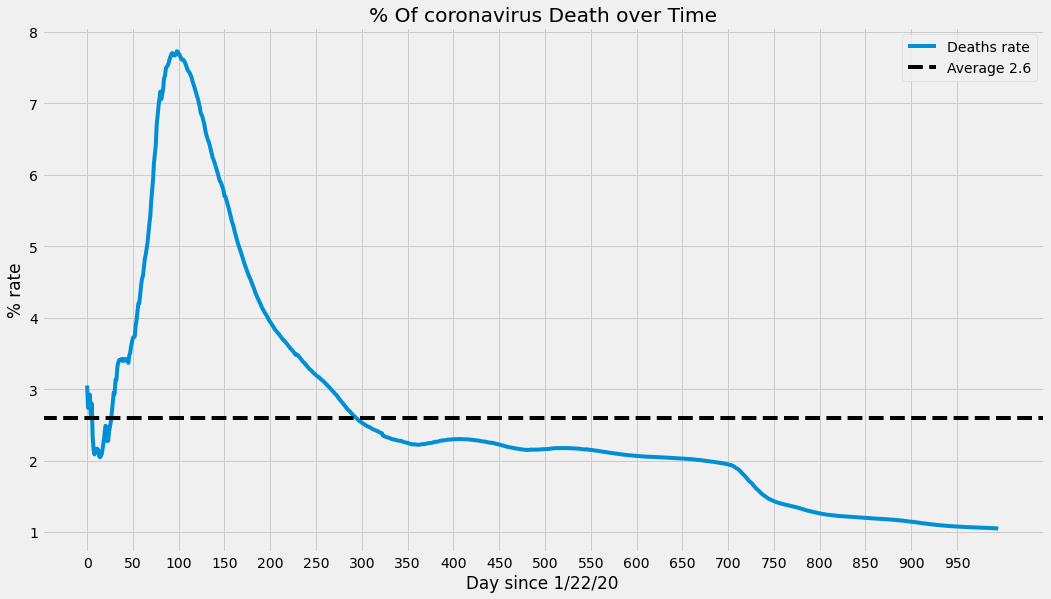

In [43]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(adjusted_dates, mortality_rate, label="Deaths rate")
ax.set_title("% Of coronavirus Death over Time")
ax.set_xlabel('Day since 1/22/20')
ax.set_ylabel('% rate')
plt.xticks(np.arange(0, len(adjusted_dates)+1, 50))
plt.axhline(y=np.nanmean(mortality_rate), color ='k', linestyle = '--', label = 'Average '+str(round(np.nanmean(mortality_rate),3)))
plt.legend()

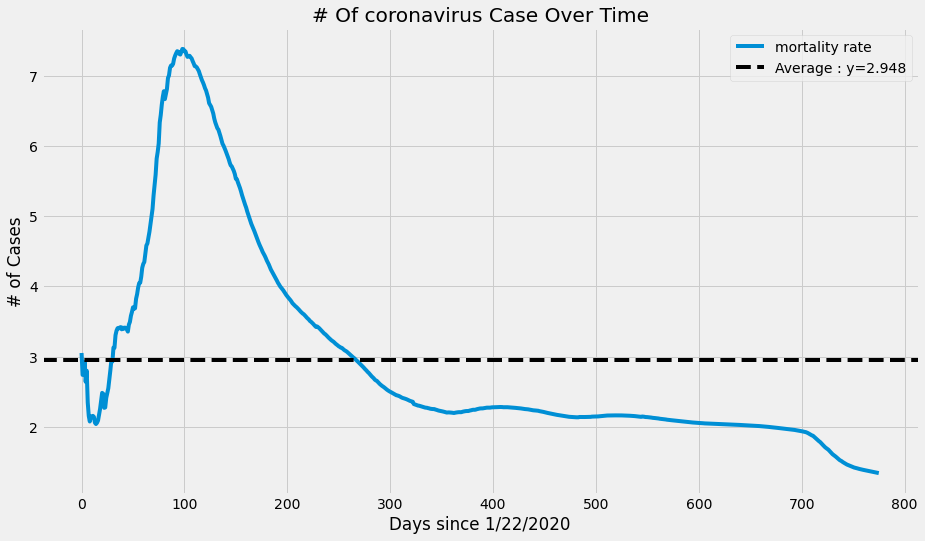

In [ ]:
#Nhập code ở đây:


**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

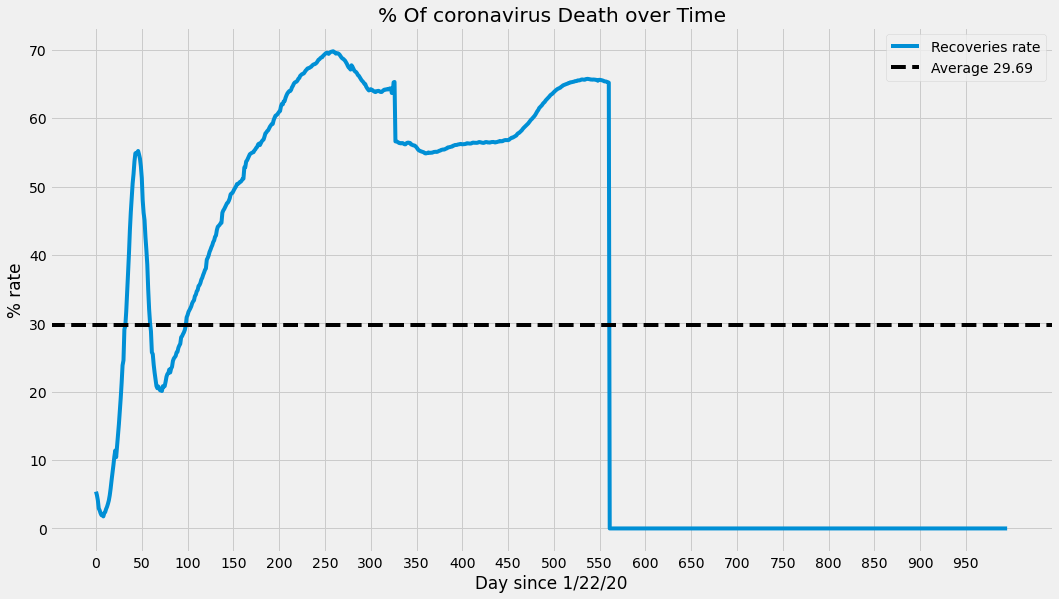

In [46]:
#Nhập code ở đây:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(adjusted_dates, recovery_rate, label="Recoveries rate")
ax.set_title("% Of coronavirus Death over Time")
ax.set_xlabel('Day since 1/22/20')
ax.set_ylabel('% rate')
plt.xticks(np.arange(0, len(adjusted_dates)+1, 50))
plt.axhline(y=np.nanmean(recovery_rate), color ='k', linestyle = '--', label = 'Average '+str(round(np.nanmean(recovery_rate),2)))
plt.legend()

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [4]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [6]:
continent_list = np.array([continents[country_to_continent_code(confirmed_df["Country/Region"][i])] for i in range(confirmed_df.shape[0])])
continent_recover = np.array([continents[country_to_continent_code(recoveries_df["Country/Region"][i])] for i in range(recoveries_df.shape[0])])

In [22]:
recoveries_df

,Province/State,Country/Region,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,Asia,33.939110,67.709953,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,Europe,41.153300,20.168300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,Africa,28.033900,1.659600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,Europe,42.506300,1.521800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,Africa,-11.202700,17.873900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,Others,39.904200,116.407400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,Asia,15.552727,48.516388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,Africa,-13.133897,27.849332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Nhập code ở đây:
confirmed_df.insert(2,"Continent", continent_list , True)
deaths_df.insert(2,"Continent", continent_list , True)
recoveries_df.insert(2,"Continent", continent_recover , True)


In [37]:
deaths_df

,Province/State,Country/Region,Continent,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,Asia,Asia,33.939110,67.709953,0,0,0,0,...,7804,7804,7806,7807,7807,7807,7809,7809,7811,7811
1,NaN,Albania,Europe,Europe,41.153300,20.168300,0,0,0,0,...,3589,3589,3589,3589,3590,3591,3591,3591,3591,3591
2,NaN,Algeria,Africa,Africa,28.033900,1.659600,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,Europe,Europe,42.506300,1.521800,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,Africa,Africa,-11.202700,17.873900,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,Others,Others,31.952200,35.233200,0,0,0,0,...,5707,5707,5707,5707,5707,5707,5707,5707,5707,5707
285,NaN,Winter Olympics 2022,Others,Others,39.904200,116.407400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,Asia,Asia,15.552727,48.516388,0,0,0,0,...,2158,2158,2158,2158,2158,2158,2158,2158,2158,2158
287,NaN,Zambia,Africa,Africa,-13.133897,27.849332,0,0,0,0,...,4017,4017,4017,4017,4017,4017,4017,4017,4017,4017


## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [34]:
by_confirm = confirmed_df.groupby("Country/Region").sum()
by_death = deaths_df.groupby("Country/Region").sum()
by_recovery = recoveries_df.groupby("Country/Region").sum()

In [55]:
by_confirm.index.get_level_values(0)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=201)

In [83]:
continent_list = np.array([continents[country_to_continent_code(by_confirm.index.get_level_values(0)[i])] for i in range(by_confirm.shape[0])])


In [36]:
by_confirm

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,200130,200202,200372,200469,200626,200729,200846,201014,201096,201212
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,332443,332472,332494,332503,332534,332555,332579,332598,332619,332638
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,270701,270701,270707,270713,270716,270722,270722,270734,270734,270740
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,46275,46275,46275,46275,46275,46366,46366,46366,46366,46366
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,702804,702804,702804,702804,702804,702804,702804,702804,702804,702804
Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,11939,11939,11939,11939,11939,11939,11939,11939,11939,11939


In [29]:
confirmed = by_confirm.loc[:, cols[4]:cols[-1]]
deaths = by_death.loc[:, cols[4]:cols[-1]]
recoveries = by_recovery.loc[:, cols[4]:cols[-1]]


In [85]:
new_df = {}
new_df["Country/Region"] = by_confirm.index.get_level_values(0)
new_df["Continent"] = continent_list
new_df["Confirmed"] = by_confirm.astype(int).max(axis=1).tolist()
new_df["Deaths"] = by_death.astype(int).max(axis=1).tolist()
new_df["Recoveries"] = by_recovery.astype(int).max(axis=1).tolist()
#new_df["Active"] = ((confirmed - deaths - recoveries).max(axis = 1)).tolist()
#new_df["Mortality Rate"] = round((deaths/confirmed*100).max(axis = 1),2).tolist()



In [86]:
a = pd.DataFrame(new_df).groupby("Continent").sum()


,Confirmed,Deaths,Recoveries
Continent,,,
Africa,12366434,256880,5955131
Asia,186697966,1464865,57859487
Australia,12361876,20265,56386
Europe,232788403,1948397,27993829
North America,114731759,1518557,12075021
Others,1629089,28976,655034
South America,64118222,1330951,32656668


In [87]:
a["Active"] = a["Confirmed"] - a["Deaths"] - a["Recoveries"] 
a["Moderality Rate"] = round( a["Deaths"]/a["Confirmed"]*100,2)

In [88]:
a

,Confirmed,Deaths,Recoveries,Active,Moderality Rate
Continent,,,,,
Africa,12366434,256880,5955131,6154423,2.08
Asia,186697966,1464865,57859487,127373614,0.78
Australia,12361876,20265,56386,12285225,0.16
Europe,232788403,1948397,27993829,202846177,0.84
North America,114731759,1518557,12075021,101138181,1.32
Others,1629089,28976,655034,945079,1.78
South America,64118222,1330951,32656668,30130603,2.08


## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [ ]:
#Nhập code ở đây:


,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,11374622,250466,0,11124156,2.20
Asia,121045115,1342824,0,119702291,1.11
Australia,3815158,7139,0,3808019,0.19
Europe,162065900,1726595,0,160339305,1.07
North America,93360723,1388571,0,91972152,1.49
Others,1502887,28235,0,1474652,1.88
South America,54719188,1263487,0,53455701,2.31


## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [5]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

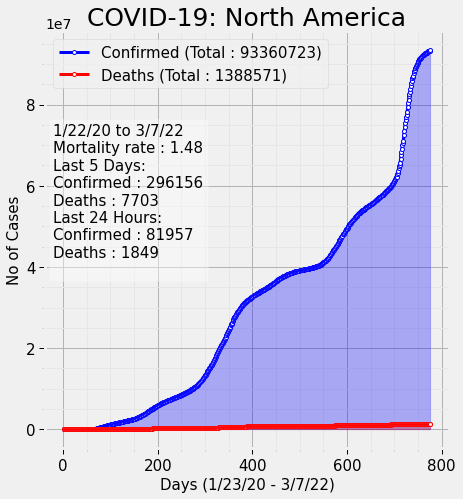

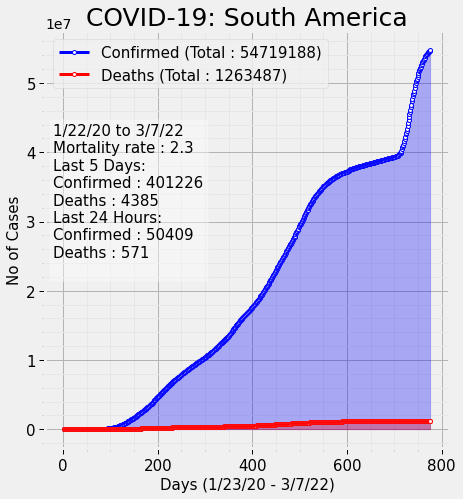

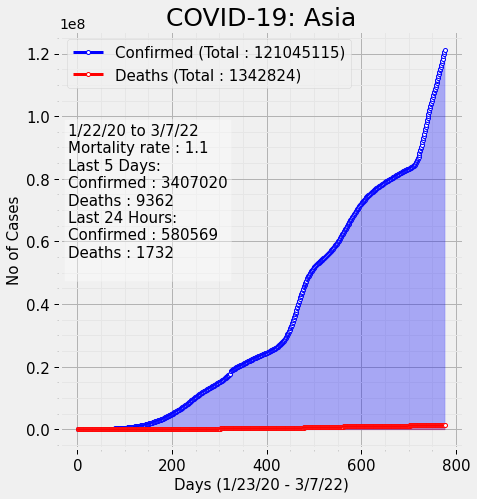

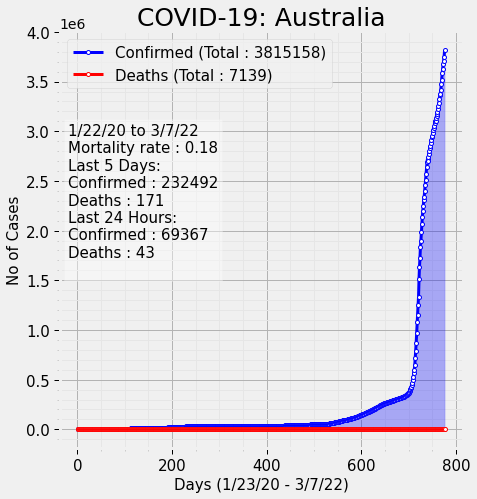

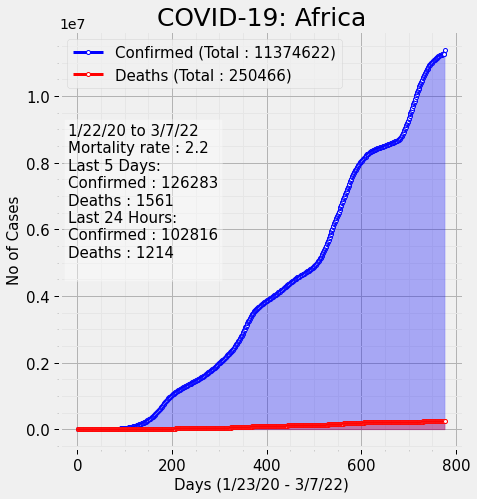

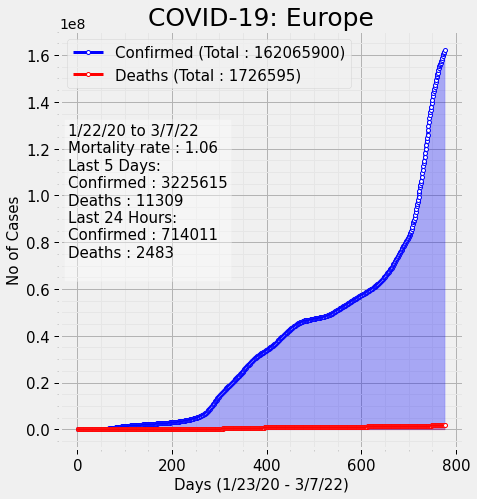

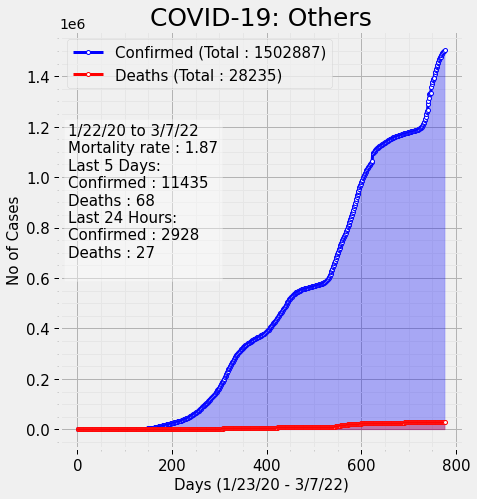

In [ ]:
#Nhập code ở đây:



**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

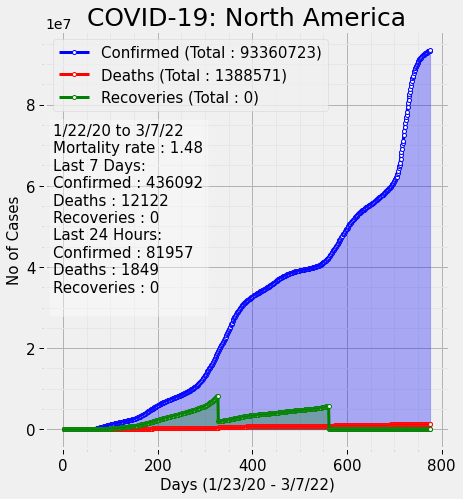

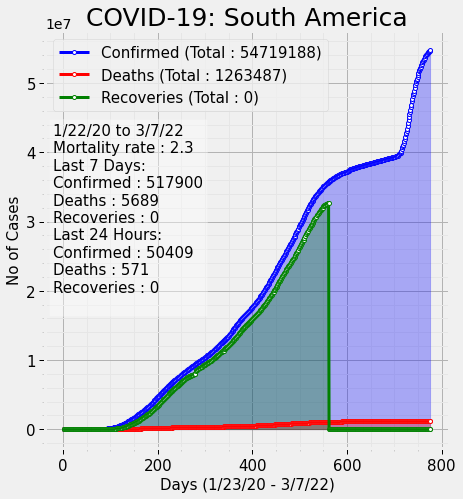

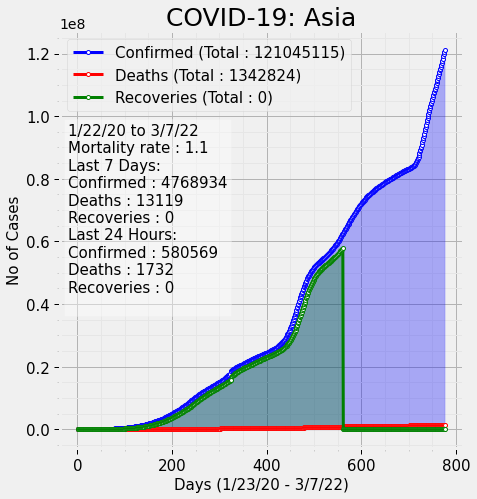

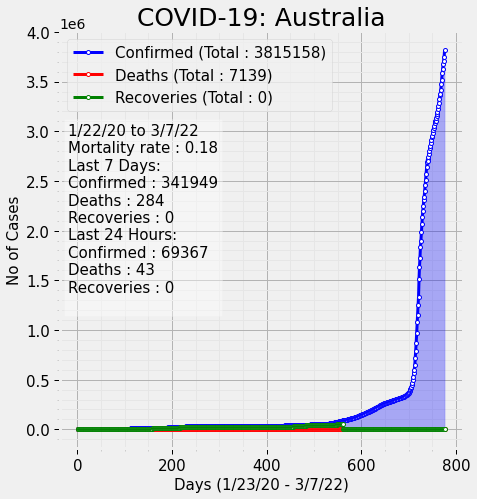

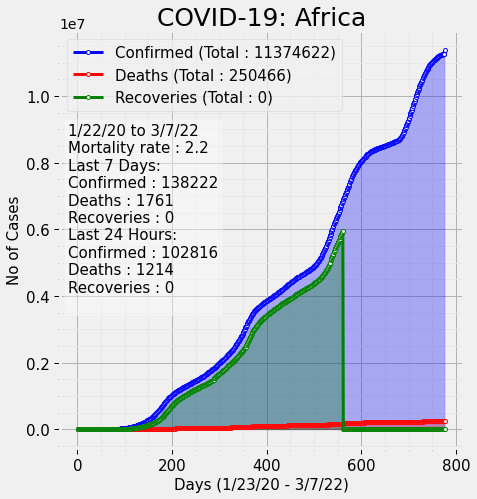

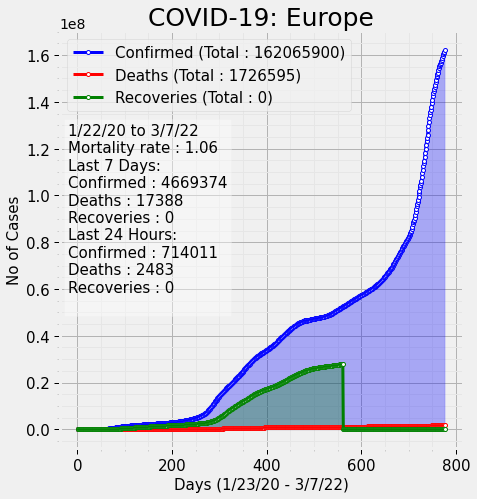

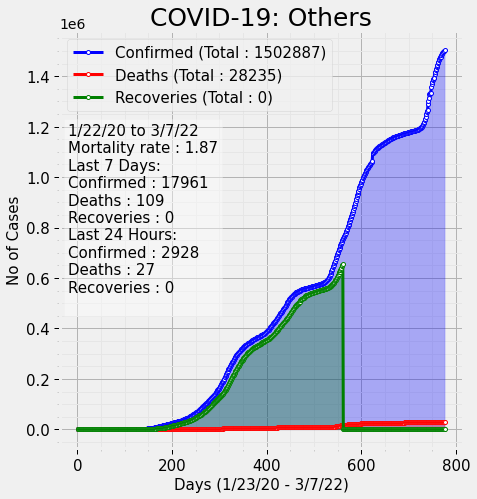

In [ ]:
#Nhập code ở đây:


## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

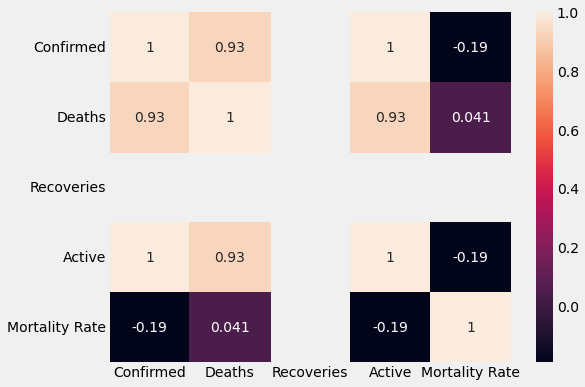

In [ ]:
#Nhập code ở đây:


## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

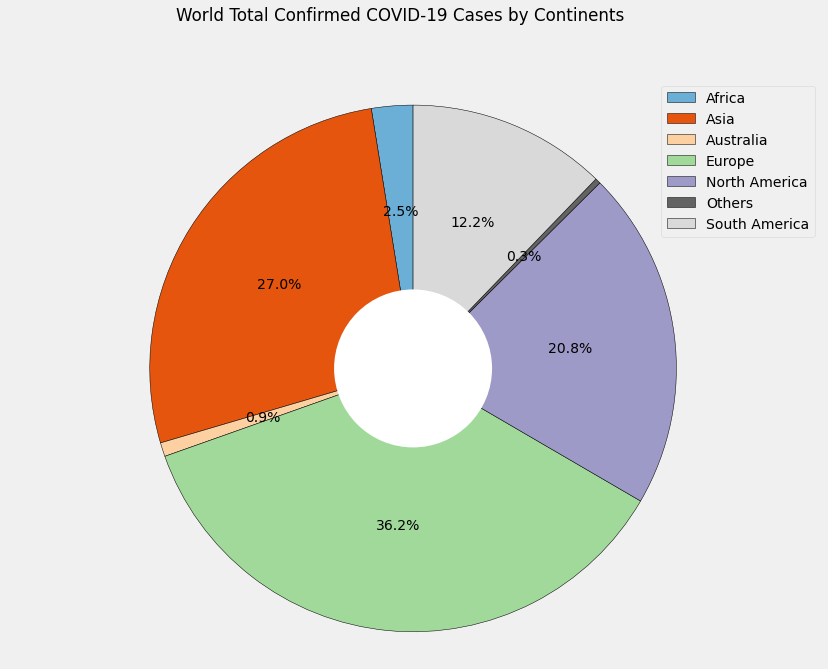

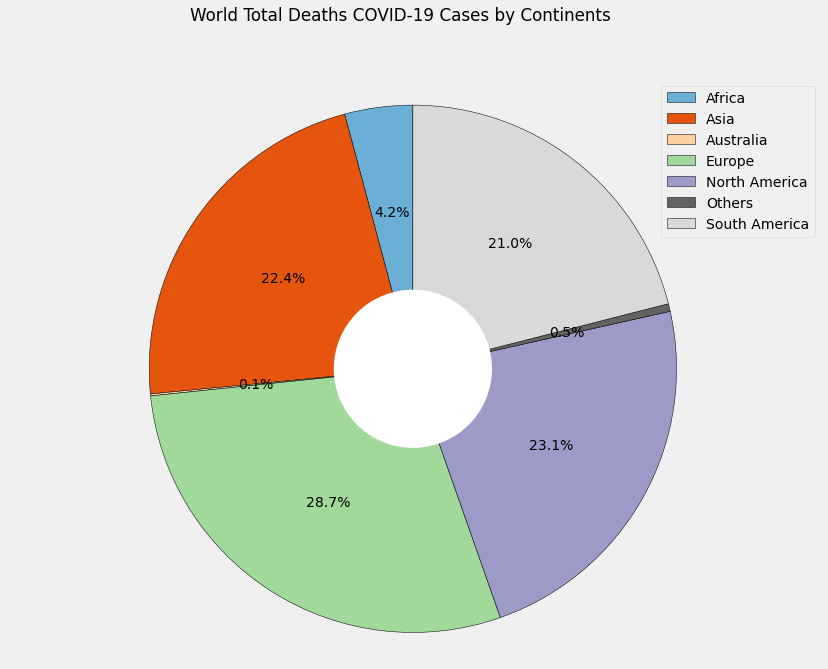

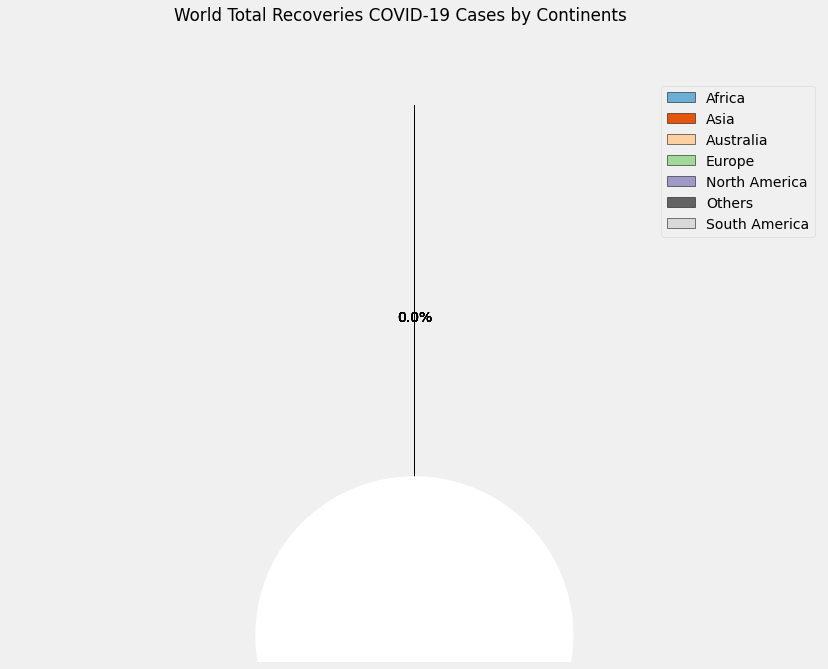

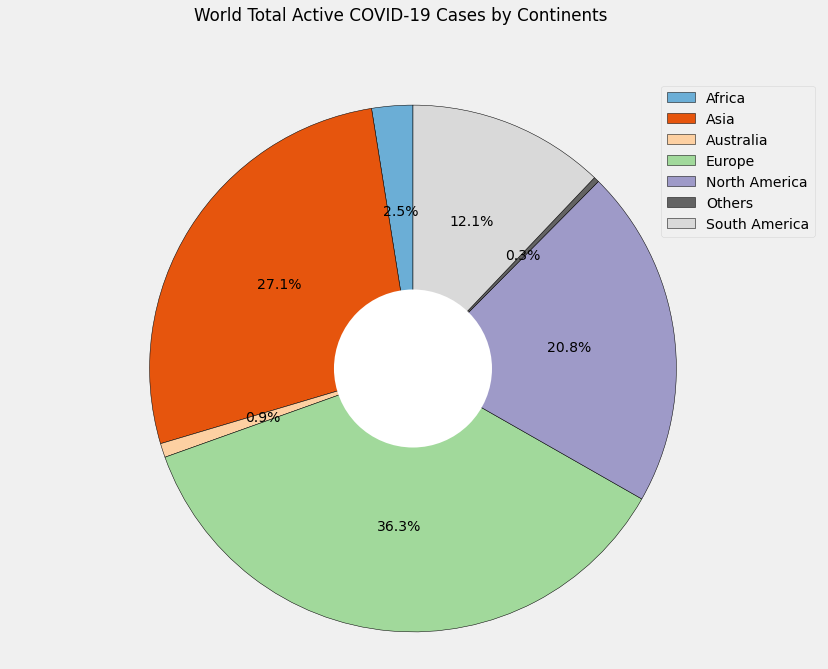

In [ ]:
#Nhập code ở đây:


# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


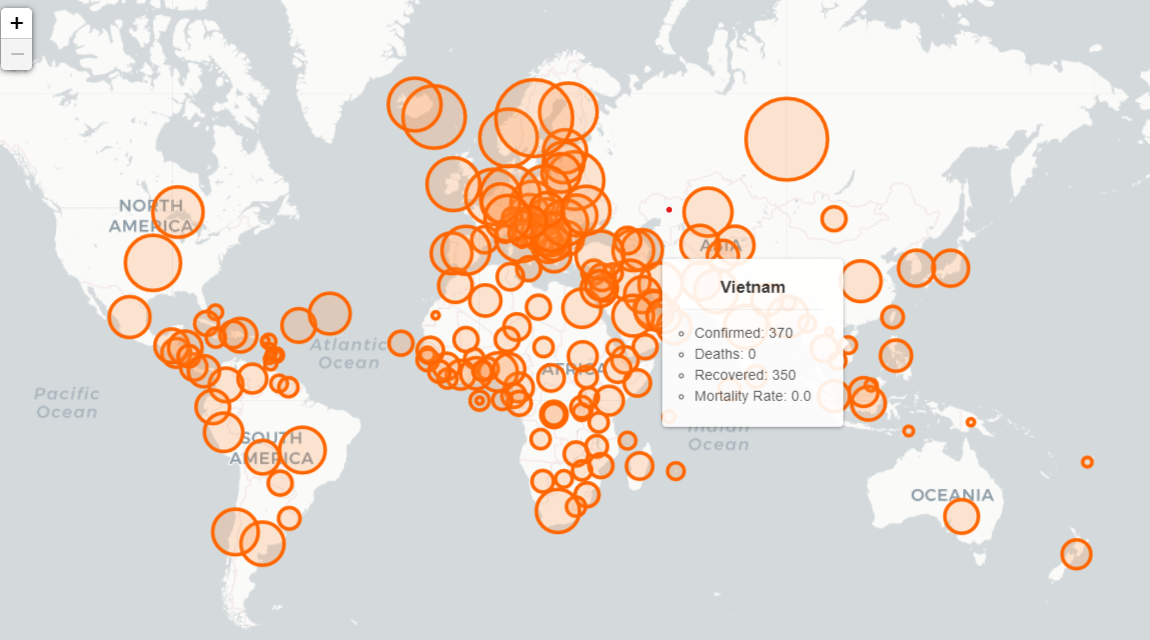

In [ ]:
#Nhập code ở đây:


## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [ ]:
#Nhập code ở đây:


errot: Summer Olympics 2020
errot: Winter Olympics 2022


## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [ ]:
#Nhập code ở đây:


,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,79339202,960311,0,78378891,1.21,40.000000,-100.000000
India,Asia,42971308,515210,0,42456098,1.20,20.593684,78.962880
Brazil,South America,29077831,652648,0,28425183,2.24,-14.235000,-51.925300
France,Europe,23253235,140473,0,23112762,0.60,6.425300,-9.839634
United Kingdom,Europe,19383743,162722,0,19221021,0.84,25.767514,-35.857561
Russia,Europe,16770275,349853,0,16420422,2.09,61.524010,105.318756
Germany,Europe,16065024,124454,0,15940570,0.77,51.165691,10.451526
Turkey,Asia,14388231,95681,0,14292550,0.66,38.963700,35.243300
Italy,Europe,13048774,156017,0,12892757,1.20,41.871940,12.567380


## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

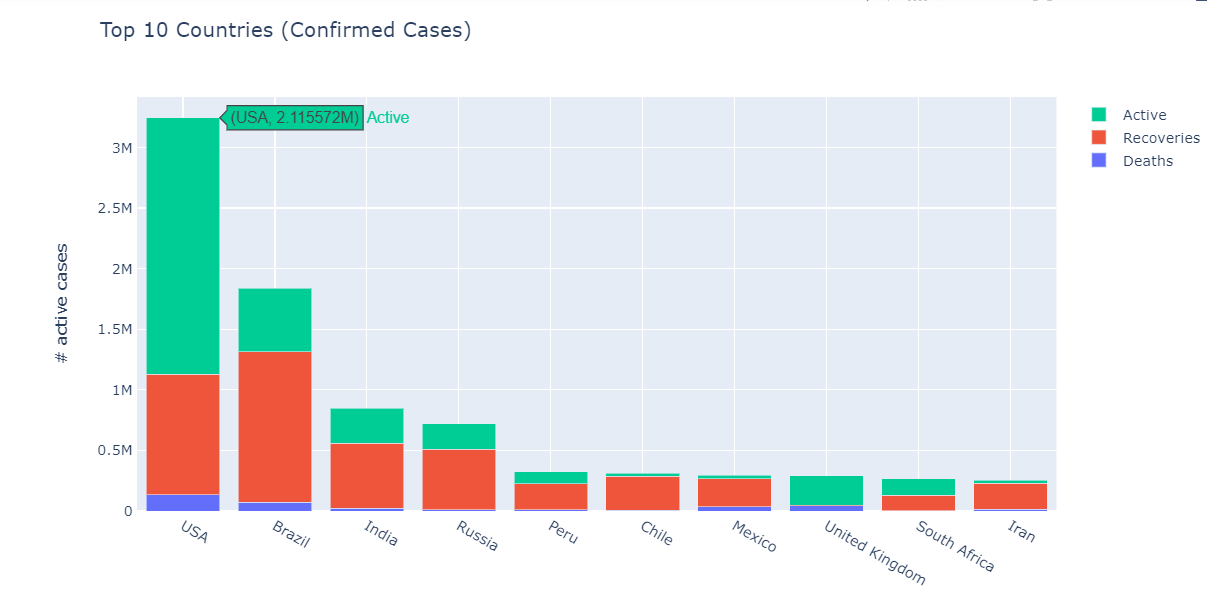

In [ ]:
#Nhập code ở đây:


# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b>

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

## Bài toán 21
**USA dataset**

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [ ]:
#Nhập code ở đây:

## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

In [ ]:
#Nhập code ở đây: